# 사이킷런으로 수행하는 타이타닉 생존자 예측 (p.129)


## 데이터와 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('titanic.csv')
data
# PassengerId : 탑승 승객 번호
# Survived : 생존 여부 (1=생존 0=사망)
# Passengerid: 탑승자 데이터 일련번호
# survived: 생존 여부, 0= 사망, 1= 생존
# pclass: 티켓의 선실 등급, 1= 일등석, 2 = 이등석, 3 = 삼등석
# sex: 탑승자 성별
# name: 탑승자 이름
# Age: 탑승자 나이
# sibsp: 같이 탑승한 형제자매 또는 배우자 인원수
# parch: 같이 탑승한 부모님 또는 어린이 인원수
# ticket: 티켓 번호
# fare : 요금
# cabin : 선실 번호
# embarked : 중간 정착 항구

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 전처리

### (1) Null 값 처리

In [4]:
# Null 값 살펴보기

data.isnull().sum()

# Age 에 Null 값이 177개 있음 -> 평균값으로 대치할 것임
# Cabin 에 Null 값 687개 -> N이라는 값으로 대치할 것임
# Embarked 에 Null 값 2개 있음 -> N이라는 값으로 대치할 것임

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# (1) Age 에 Null 값이 177개 있음 -> 평균값으로 대치할 것임
# (2) Cabin 에 Null 값 687개 -> N이라는 값으로 대치할 것임
# (3) Embarked 에 Null 값 2개 있음 -> N이라는 값으로 대치할 것임

data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Cabin'].fillna('N', inplace=True)
data['Embarked'].fillna('N', inplace=True)


In [6]:
# 대치 확인

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### (2) 다른 값들 둘러보기

In [7]:
print('Sex 칼럼')
print(data['Sex'].value_counts())
print('\n')

print('Cabin 칼럼')
print(data['Cabin'].value_counts())
print('\n')

print('Embarked 칼럼')
print(data['Embarked'].value_counts())
print('\n')

Sex 칼럼
male      577
female    314
Name: Sex, dtype: int64


Cabin 칼럼
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64


Embarked 칼럼
S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64




### (3) Cabin 칼럼 전처리

* Cabin 칼럼은 선실 번호로, 동일 레이블에는 동일 캐빈 클래스 (A, B, C, ...) 가 기록되어 있다.  
* 이를 수월한 처리를 위해 앞 글자만을 따올 것이다.  

In [8]:
data['Cabin'] = data['Cabin'].str[:1]
data['Cabin']

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

## 탐색적 데이터 분석 

* 생존에 영향을 주는 항목이 무엇인지에 대해 탐색적 데이터 분석을 진행한다.  
* 여기에서는 상황별 데이터 살펴보기 미 시각화 등을 진행한다.  

### 성별에 따른 생존율

In [9]:
# '성별'이 '생존률'에 영향을 미치는지
# 성별과 생존여부로 그룹바이 후 -> 이에 해당하는 행의 갯수를 count
sex_surv = data.groupby(['Sex','Survived'])['Survived'].count()
pd.DataFrame(sex_surv)

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

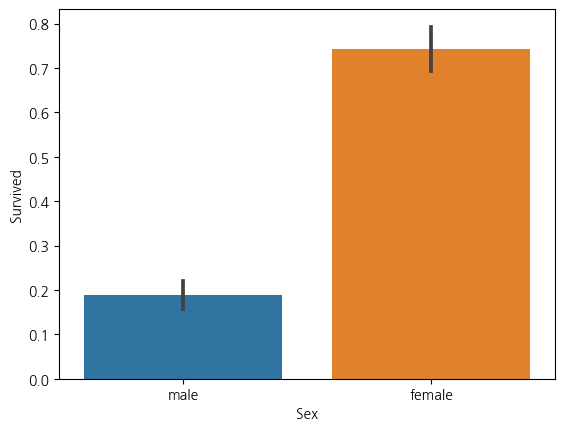

In [10]:
# 성별의 영향도를 더 명확히 보기 위해 시각화
# 성별에 따른 '생존율' 을 구해보는 것
sns.barplot(data = data, x = 'Sex', y = 'Survived')

### 선실 등급별 생존율

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

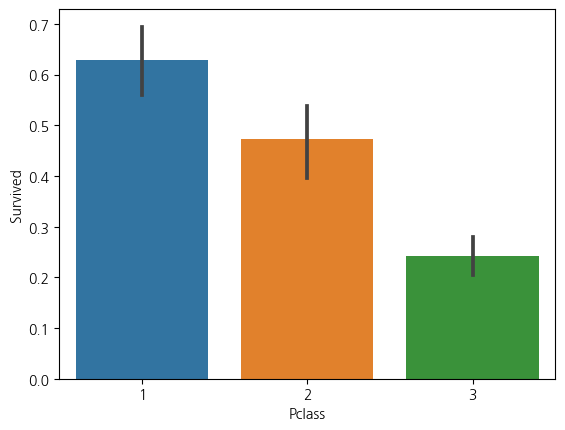

In [11]:
sns.barplot(data = data, x ='Pclass' , y = 'Survived')

### 성별 X 선실 등급별 생존율

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

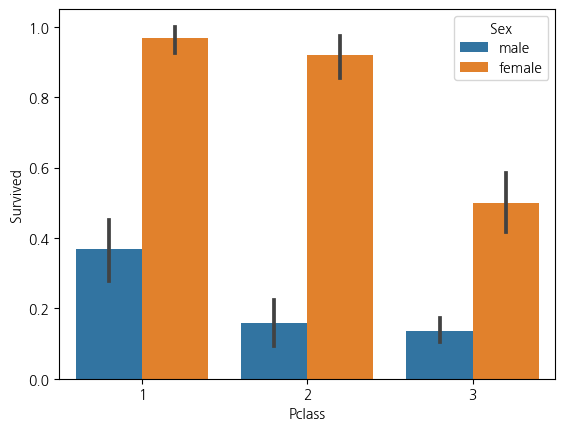

In [12]:
sns.barplot(data = data, x = 'Pclass', y = 'Survived', hue = 'Sex')

### 연령대에 따른 생존율

In [13]:
# 나이 데이터 살펴보기
print(data['Age'].value_counts())

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64


In [14]:
# 나이 데이터 그룹으로 묶을 수 있도록 함수 선언

def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'
    return cat

In [15]:
data['Age_CAT'] = data['Age'].apply(lambda x : get_category(x))
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_CAT
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S,Student
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S,Young Adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C,Young Adult


<AxesSubplot:xlabel='Age_CAT', ylabel='Survived'>

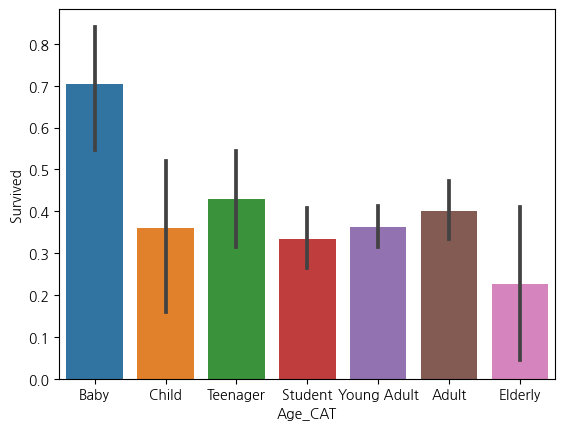

In [16]:
# 시각화
# 원하는 순서(어린 -> 나이 많은)로 노출

sns.barplot(data = data, x = 'Age_CAT', y = 'Survived',
            order=['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly'])

### 연령대 X 성별 생존율

<AxesSubplot:xlabel='Age_CAT', ylabel='Survived'>

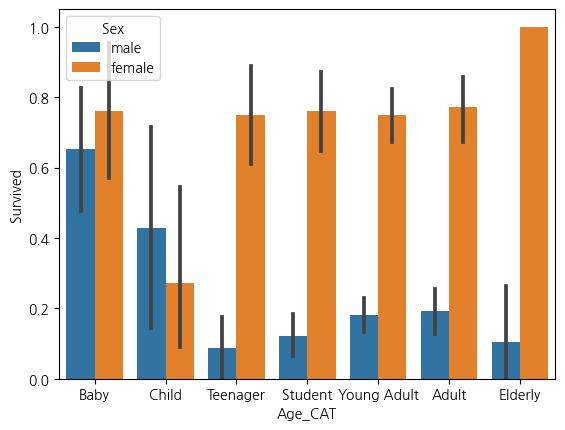

In [17]:
# 시각화
# 성별 X 나이대 별 생존율

sns.barplot(data = data, x = 'Age_CAT', y = 'Survived',
            order=['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly'],
            hue='Sex')

## 데이터 인코딩

### 인코딩이 필요한 데이터가 무엇인지 탐색

In [18]:
print(data.info())
print(data['Cabin'].value_counts())
print(data['Sex'].value_counts())
print(data['Ticket'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Age_CAT      891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB
None
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
347082      7
CA. 2343    7
1601      

### 데이터 인코딩 함수 만들기

In [19]:
# 인코딩 라이브러리 import와 인코딩 함수 생성
from sklearn.preprocessing import LabelEncoder

In [20]:
# 인코딩 함수 선언
def encode_features(dataDF):
    features=['Sex', 'Cabin', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        dataDF[feature] = le.fit_transform(dataDF[feature])
        
        print(le.classes_)
        
    return dataDF

In [21]:
# 인코딩 진행

data_encoded = encode_features(data)
data_encoded.head(2)

['female' 'male']
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'N' 'T']
['C' 'N' 'Q' 'S']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_CAT
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult


### 데이터 결측치 해결 함수 작성

In [27]:
def fillna(data):
    data['Age'].fillna(data['Age'].mean(), inplace = True)
    data['Cabin'].fillna('N', inplace = True)
    data['Embarked'].fillna('N', inplace = True)
    data['Fare'].fillna(0, inplace = True)
    return data

### 데이터 간소화 함수 작성

In [29]:
def format_features(data):
    from sklearn.preprocessing import LabelEncoder
    data['Cabin'] = data['Cabin'].str[:1]
    features = ['Sex', 'Cabin', 'Embarked']
    for feature in features :
        le = LabelEncoder()
        data[feature] = le.fit_transform(data[feature])
        print(le.classes_)
    return data

In [24]:
def drop_features(data):
    data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return data

In [25]:
def transform_features(data):
    data = fillna(data)
    data = drop_features(data)
    data = format_features(data)
    return data

### 데이터 인코딩 적용

In [32]:
data = pd.read_csv('titanic.csv')
y = data['Survived']
X = data.drop(columns=['Survived'])
X = transform_features(X)

X.head(2)

['female' 'male']
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'N' 'T']
['C' 'N' 'Q' 'S']


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0


## 데이터셋 나누기 : 훈련, 테스트

In [ ]:
# 라이브러리 import
from sklearn.model_selection import train_test_split

In [ ]:
# 테스트 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=11)

In [58]:
# 라이브러리 import
from sklearn.tree import DecisionTreeClassifier       # 의사결정나무 모델
from sklearn.ensemble import RandomForestClassifier   # 랜덤포레스트 모델
from sklearn.linear_model import LogisticRegression  # 로지스틱 회귀 모델
from sklearn.metrics import accuracy_score            # 모델 평가

## 데이터 머신러닝 모델

In [59]:
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

### Decision Tree 모델

In [60]:
dt_clf.fit(X_train, y_train)     # 학습 시키기
dt_pred = dt_clf.predict(X_test) # 예측 값 구하기
accuracy_score(y_test, dt_pred)  # 모델 평가

0.7877094972067039

### Random Forest 모델 

In [63]:
rf_clf.fit(X_train, y_train)     # 학습 시키기
rf_pred = rf_clf.predict(X_test) # 예측 값 구하기
accuracy_score(y_test, rf_pred)  # 모델 평가

0.8547486033519553

### Logistic Regression 모델

In [64]:
lr_clf.fit(X_train, y_train)     # 학습 시키기
lr_pred = lr_clf.predict(X_test) # 예측 값 구하기
accuracy_score(y_test, lr_pred)  # 모델 평가

0.8659217877094972

## 검증

### K-fold : 직접 해보기

### GridSearchCV

In [67]:
### GridSearchCV import와 세팅

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Grid param 세팅
param = {
    'max_depth' : [2, 3, 5, 10],
    'min_samples_split' : [2, 3, 5],
    'min_samples_leaf' : [1, 5, 8]
}

In [70]:
### Grid CV로 DecisionTree 모델 검증하기

grid = GridSearchCV(dt_clf, param, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)  # 데이터셋 학습 시키기

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

In [71]:
### Grid 로 검증한 정확도

pred = grid.predict(X_test)
accuracy_score(y_test, pred)

0.8715083798882681

In [74]:
print("== best param ==")
print(grid.best_params_) # 가장 성능이 좋았을 때의 파라미터 값
print("\n")

print("== best param ==")
print(grid.cv_results_) # result
print("\n")

== best param ==
{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}


== best param ==
{'mean_fit_time': array([0.00300088, 0.00180874, 0.00327654, 0.00289035, 0.00242901,
       0.00187349, 0.00264592, 0.        , 0.0031271 , 0.00041237,
       0.0031652 , 0.00101023, 0.        , 0.00113683, 0.00297379,
       0.00365877, 0.        , 0.00312595, 0.        , 0.        ,
       0.00329022, 0.00314403, 0.00312462, 0.00312414, 0.        ,
       0.00352197, 0.        , 0.        , 0.        , 0.        ,
       0.00625081, 0.00312271, 0.00311103, 0.00397105, 0.00496502,
       0.00238976]), 'std_fit_time': array([6.34250434e-04, 4.03346391e-04, 1.62181199e-03, 1.56705769e-04,
       8.28358514e-04, 7.80747265e-04, 7.07959077e-04, 0.00000000e+00,
       6.25419617e-03, 8.24737549e-04, 6.94690085e-04, 1.54433143e-03,
       0.00000000e+00, 1.39554526e-03, 6.31114632e-04, 6.10860776e-03,
       0.00000000e+00, 6.25190735e-03, 0.00000000e+00, 0.00000000e+00,
       6.58044815e-03